In [54]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt


planck = '/home/rt2122/Desktop/data-segmentation/data_src/Planck_SZ2.fits'
p_z = None
with fits.open(planck) as table:
    table.verify('fix')
    data = table[1].data
    keys = data.names
    print(keys)
    redshifts = np.array(data['z'])
    redshifts = redshifts[redshifts != -1]
    p_z = redshifts

['Index', 'Name', 'GLON', 'GLAT', 'RAdeg', 'DEdeg', 'e_pos', 'SNR', 'Pipeline', 'PipeDet', 'PCCS2', 'PSZ', 'f_IR', 'q_neural', 'Y5R500', 'e_Y5R500', 'Val', 'zID', 'z', 'MSZ', 'E_MSZ', 'e_MSZ', 'MCXC', 'RedMAPPer', 'ACT', 'SPT', 'f_WISE', 'AMIevi', 'COSMO', 'Comment']


 [astropy.io.fits.verify]


In [21]:
mcxc = '/home/rt2122/Desktop/data-segmentation/data_src/MCXC.fits'
m_z = None
with fits.open(mcxc) as mcxc_table:
    mcxc_table.verify('fix')
    m_data = mcxc_table[1].data
    m_keys = m_data.names
    key_names = m_keys[:3]

    mcxc_names = [m_data[x] for x in key_names]
    mcxc_names = np.array(mcxc_names).astype(str)

    mradec = [m_data['radeg'], m_data['dedeg']]
    mradec = np.array(mradec).astype(float)
    redshifts = m_data['z']
    redshifts = redshifts[redshifts != -1]
    m_z = redshifts


In [56]:
filename = '/home/rt2122/Desktop/data-segmentation/data_src/redmapper_dr8_public_v6.3_catalog.fits'
r_z = None
with fits.open(filename) as table:
    table.verify('fix')
    data = table[1].data
    keys = data.names
    print(keys)
    redshifts = data['Z_SPEC']
    redshifts = redshifts[redshifts != -1]
    r_z = redshifts


['ID', 'NAME', 'RA', 'DEC', 'Z_LAMBDA', 'Z_LAMBDA_ERR', 'LAMBDA', 'LAMBDA_ERR', 'S', 'Z_SPEC', 'OBJID', 'IMAG', 'IMAG_ERR', 'MODEL_MAG_U', 'MODEL_MAGERR_U', 'MODEL_MAG_G', 'MODEL_MAGERR_G', 'MODEL_MAG_R', 'MODEL_MAGERR_R', 'MODEL_MAG_I', 'MODEL_MAGERR_I', 'MODEL_MAG_Z', 'MODEL_MAGERR_Z', 'ILUM', 'P_CEN', 'RA_CEN', 'DEC_CEN', 'ID_CEN', 'PZBINS', 'PZ']


In [50]:
def overlaid_histogram(data1, data2, data3, n_bins = 0, data1_name="", data1_color="#539caf", 
                       data2_name="", data2_color="#7663b0", data3_name = "", data3_color="#ffff00", 
                       x_label="", y_label="", title=""):
    # Set the bounds for the bins so that the two distributions are fairly compared
    max_nbins = 10
    data_range = [min(min(data1), min(data2), min(data3)), max(max(data1), max(data2), max(data3))]
    binwidth = (data_range[1] - data_range[0]) / max_nbins


    bins = n_bins

    # Create the plot
    _, ax = plt.subplots()
    ax.hist(data1, bins = bins, color = data1_color, alpha = 0.75, label = data1_name)
    ax.hist(data2, bins = bins, color = data2_color, alpha = 0.75, label = data2_name)
    ax.hist(data3, bins = bins, color = data3_color, alpha = 0.75, label = data3_name)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    ax.legend(loc = 'best')

No handles with labels found to put in legend.


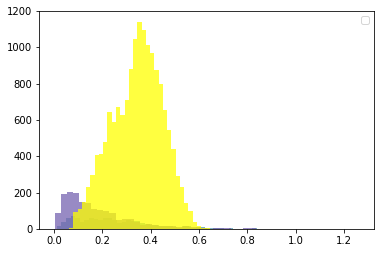

In [57]:
overlaid_histogram(p_z, m_z, r_z, n_bins = 50)

No handles with labels found to put in legend.


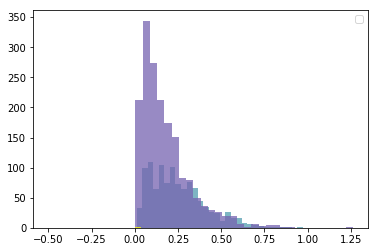

In [53]:
overlaid_histogram(p_z, m_z, [0], n_bins =30)